## Importing libraries

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

## Reading and Plotting a sample image

In [12]:
img_array = cv2.imread("dataset/train/closed_eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

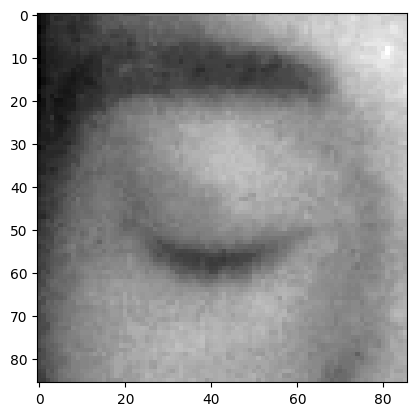

In [13]:
plt.imshow(img_array, cmap="gray")

## Image Preprocessing

In [14]:
img_array.shape

(86, 86)

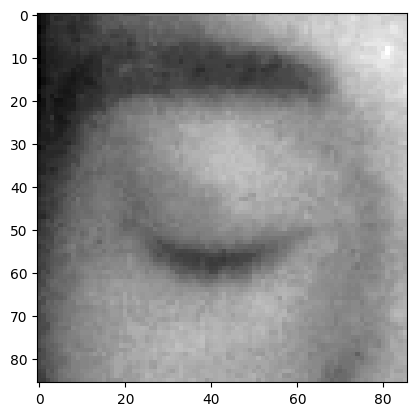

In [15]:
Datadirectory = "dataset/train/"
Classes = ["closed_eyes","open_eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

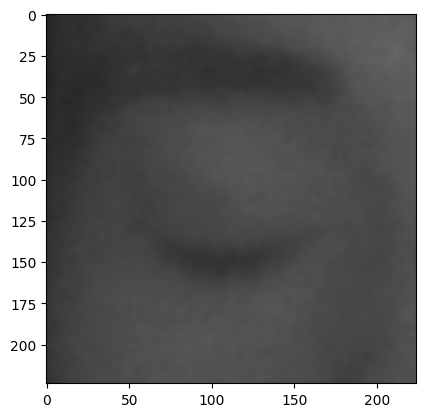

In [16]:
img_size = 224
new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [17]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [18]:
create_training_Data()

In [19]:
print(len(training_Data))

58000


In [20]:
import random

random.shuffle(training_Data)

In [5]:
x = []
y = []
for features,label in training_Data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1, img_size, img_size, 3)

NameError: name 'training_Data' is not defined

In [ ]:
X.shape

In [ ]:
# normalize the data
X = X/255.0;

In [ ]:
Y = np.array(y)

In [ ]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Creating the model

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="binary_crossentropy",  optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.3)

In [ ]:
 new_model.save('my_model.h5')

In [3]:
new_model = tf.keras.models.load_model('my_model.h5')

In [6]:
img_size = 224
img_array = cv2.imread("dataset/test/closed_eyes/s0002_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [7]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [8]:
X_input.shape

(1, 224, 224, 3)

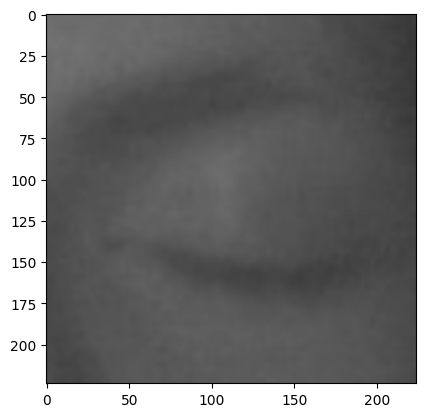

In [9]:
plt.imshow(new_array)

In [10]:
X_input = X_input/255.0

In [11]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 2s 2s/step


In [12]:
prediction

array([[2.28157e-05]], dtype=float32)

In [13]:
img_array2 = cv2.imread("dataset/test/open_eyes/s0001_01852_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb2 = cv2.cvtColor(img_array2,cv2.COLOR_GRAY2RGB)
new_array2 = cv2.resize(backtorgb2, (img_size,img_size))

In [14]:
X_input2 = np.array(new_array2).reshape(1, img_size, img_size, 3)

In [15]:
X_input2.shape

(1, 224, 224, 3)

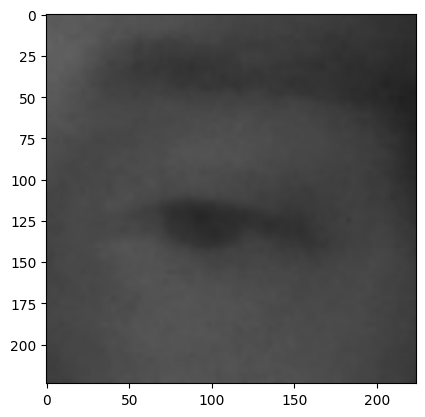

In [16]:
plt.imshow(new_array2)

In [17]:
X_input2 = X_input2/255.0

In [18]:
prediction2 = new_model.predict(X_input2)

1/1 [==============================] - 0s 170ms/step


In [19]:
prediction2

array([[0.10801411]], dtype=float32)

## Making predictions on test dataset

In [20]:
test_dir = 'dataset/test/'
classes = ["closed_eyes", "open_eyes"]

closed_eyes_predictions = []
open_eyes_predictions = []

for category in classes:
    path = os.path.join(test_dir, category)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        if img_array is not None:
            img_size = 224
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(backtorgb, (img_size,img_size))
            X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
            X_input = X_input/255.0
            
            # Make predictions using the loaded model
            prediction = new_model.predict(X_input)
            if category == "closed_eyes":
                closed_eyes_predictions.append(prediction)
            elif category == "open_eyes":
                open_eyes_predictions.append(prediction)

1/1 [==============================] - 0s 119ms/step


In [21]:
closed_eyes_predictions = np.array(closed_eyes_predictions)
open_eyes_predictions = np.array(open_eyes_predictions)

## Choosing an appropriate threshold

In [22]:
min_closed_eyes = closed_eyes_predictions.min()
max_closed_eyes = closed_eyes_predictions.max()

min_open_eyes = open_eyes_predictions.min()
max_open_eyes = open_eyes_predictions.max()

print("Minimum and Maximum values for Closed Eyes Predictions:")
print(f"Min: {min_closed_eyes}, Max: {max_closed_eyes}")

print("\nMinimum and Maximum values for Open Eyes Predictions:")
print(f"Min: {min_open_eyes}, Max: {max_open_eyes}")

Minimum and Maximum values for Closed Eyes Predictions:
Min: 1.5147622889344348e-06, Max: 0.5095694065093994

Minimum and Maximum values for Open Eyes Predictions:
Min: 1.390376110066427e-05, Max: 0.9999881982803345


In [2]:
threshold = (max_closed_eyes + min_open_eyes) / 2
print(f"Threshold: {threshold}")


NameError: name 'max_closed_eyes' is not defined

In [3]:
threshold = 0.25479164719581604
new_model = tf.keras.models.load_model('my_model.h5')

## Testing on an unknown image

In [4]:
img = cv2.imread("woman.png")

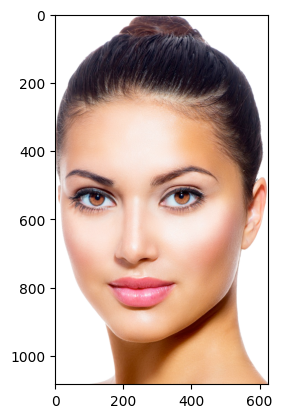

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [10]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

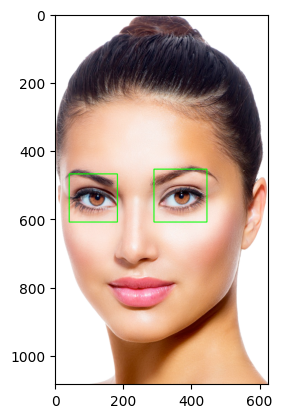

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

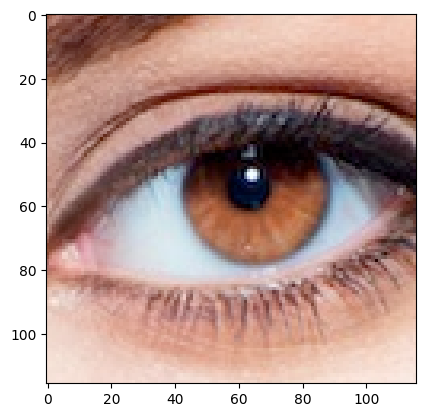

In [13]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [14]:
eyes_roi.shape

(116, 116, 3)

In [15]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [16]:
final_image.shape

(1, 224, 224, 3)

In [17]:
new_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


array([[0.99961126]], dtype=float32)

## Real-Time Detection

In [18]:
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eyeCascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
                
    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0.25479182600975037):
        status  = "Open Eyes"
    else:
        status = "Closed Eyes"
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 212ms/step
False
1/1 [==============================] - 0s 128ms/step
False
1/1 [==============================] - 0s 109ms/step
False
1/1 [==============================] - 0s 197ms/step
False
1/1 [==============================] - 0s 167ms/step
False
1/1 [==============================] - 0s 113ms/step
False
1/1 [==============================] - 0s 111ms/step
False


## Generating an  alarm

In [20]:
import winsound

frequency = 2500 #setting frequency to 2500 hertz
duration = 1000 #setting duration to 1000 ms == 1 second

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
counter = 0
    
while True:
    ret, frame = cap.read()
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eyeCascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
                
    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0.25479182600975037):
        status  = "Open Eyes"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
        x1, y1, w1, h1, = 0, 0, 175, 75
        
        #draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        #add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
        if counter>5:
            x1, y1, w1, h1, = 0, 0, 175, 75
        
            #draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
            #add text
            cv2.putText(frame, 'Sleep Alert!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            winsound.Beep(frequency, duration)
            counter = 0

    cv2.imshow('Driver Drowsiness Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 110ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 113ms/step
Eyes are not detected
1/1 [==============================] - 0s 93ms/step
Eyes are not detected
1/1 [==============================] - 0s 97ms/step
Eyes are not detected
1/1 [==============================] - 0s 130ms/step
Eyes are not detected
1/1 [==============================] - 0s 123ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 103ms/step
Eyes are not detected
1/1 [==============================] - 0s 113ms/step
Eyes are not detected
1/1 [==============================] - 0s 96ms/step
Eyes are not detected
1/1 [==============================] - 0s 117ms/step
Eyes are not detected
1/1 [==============================] - 0s 101ms/step
Eyes are not detected
1/1 [==============================] - 0s 97ms/step
Eyes are not detected
1/1 [==============================] - 0s 115ms/step
Eyes ar